[0.28845814 0.21570572]
[0.28845814 0.50416386]
k=2, silhouette score=0.4673692563697955
k=3, silhouette score=0.4533200631181712
k=4, silhouette score=0.4096563719539622
k=5, silhouette score=0.4027911067791365
k=6, silhouette score=0.38826241614257795
k=7, silhouette score=0.38313980941460063
k=8, silhouette score=0.3945339493495845
k=9, silhouette score=0.3745471389195696
k=10, silhouette score=0.3676617841990256
k=11, silhouette score=0.37902283722704183
k=12, silhouette score=0.3737042688452699
k=13, silhouette score=0.37274000951140773


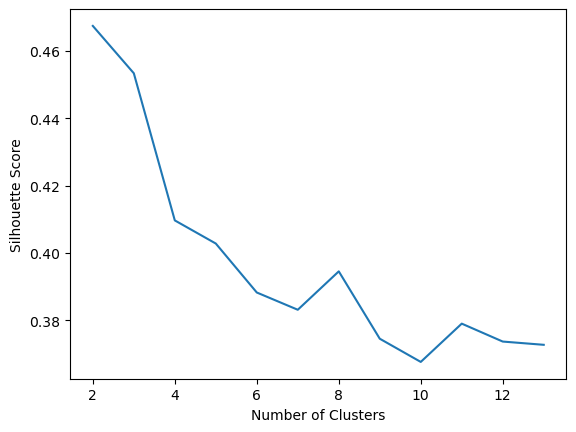

In [52]:
#1 Apply PCA on CC dataset.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#Reading the data
df1 = pd.read_csv('/Users/chaitanyakamlekar/Downloads/datasets/CC GENERAL.csv')

# Dropping the irrelevant columns
df1.drop(['CUST_ID', 'TENURE'], axis=1, inplace=True)

# Missing values filled using column mean
df1.fillna(df1.mean(), inplace=True)

# Data standardizing
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

# 1. a) Here applying PCA on CC dataset
pca = PCA(n_components=2)
pca.fit(df1_scaled)

# For explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# For cumulative sum of explained variance
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Printing the variance ratio and cumulative sum
print(explained_variance_ratio)
print(cumulative_explained_variance_ratio)

# Applying  PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df1_scaled)

# 1. b) Applying  k-means for k=2 to 14 and get the silhouette scores
silhouette_scores = []
for k in range(2, 14):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    score = silhouette_score(pca_result, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette score={score}")
    
# Plot the silhouette scores
plt.plot(range(2, 14), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [51]:
#1. c) Perform Scaling+PCA+K-Means and report performance.

# Loading the dataset
df2 = pd.read_csv('/Users/chaitanyakamlekar/Downloads/datasets/CC GENERAL.csv')

# Dropping the irrelevant columns
df2.drop(['CUST_ID', 'TENURE'], axis=1, inplace=True)

# Missing values filled using column mean
df2.fillna(df2.mean(), inplace=True)


# Scaling the data
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)


# Performing the  PCA on the data with components 2
pca = PCA(n_components=2)
df_pca1 = pca.fit_transform(df2_scaled)


# Applying K-Means to data
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_pca1)
label = kmeans.labels_

# Calculate the silhouette score
silhouette_average = silhouette_score(df_pca1, label)
print(f"The average silhouette score is : {silhouette_average}")

The average silhouette score is : 0.4027912045530114


In [31]:
#2.  Use pd_speech_features.csv
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# reading data
df3= pd.read_csv('/Users/chaitanyakamlekar/Downloads/datasets/pd_speech_features.csv')

X = df3.iloc[:, :-1].values
y = df3.iloc[:, -1].values

#2. a) performing Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#2. b) performing pca with components 3
pca1 = PCA(n_components=3)
X_pca = pca1.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#2. c) Using SVM to report performance 
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"The Accuracy is : {accuracy}")



The Accuracy is : 0.7960526315789473


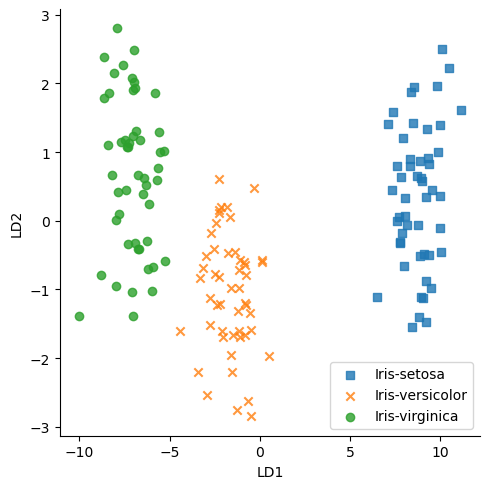

In [45]:
# 3. Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data tok=2.

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns

df1=pd.read_csv('/Users/chaitanyakamlekar/Downloads/datasets/Iris.csv')
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

#scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#LDA to reduce dimensonality for k=2
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

data=pd.DataFrame(X_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

markers = ['s', 'x', 'o']
colors = ['y', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend()
plt.show()

In [ ]:
#4. Briefly identify the difference between PCA and LDA
# The number of samples are less, in this case PCA performs well 
# If a large dataset has multiple classes, LDA works better, class separability is an important factor in reducing dimensionality.
# PCA is an unsupervised method that helps to find the most important features or directions where as the LDA is supervised
# method to find the most discriminative features.